In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import norm
import powerlaw

/home/pourtoi/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/pourtoi/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('Densities_Strikes_Monthly12.csv')
data

,Strike,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,...,2020-12-16,2020-12-17,2020-12-18,2020-12-21,2020-12-22,2020-12-23,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000e+00,0.0,-4.107995e-123,0.000000e+00,-2.703962e-15,NaN,NaN,-3.516771e-136,NaN
1,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000e+00,0.0,-3.086249e-121,0.000000e+00,-2.554914e-15,0.000000e+00,-2.084227e-153,-5.281952e-135,0.000000e+00
2,1100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000e+00,0.0,-2.674033e-120,0.000000e+00,-1.796836e-15,0.000000e+00,-9.028019e-149,-8.522340e-135,0.000000e+00
3,1200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000e+00,0.0,-3.751132e-120,0.000000e+00,-9.525118e-16,0.000000e+00,-5.857336e-145,-2.186961e-135,0.000000e+00
4,1300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000e+00,0.0,-1.087367e-120,0.000000e+00,-3.797595e-16,0.000000e+00,-9.083127e-142,-1.223373e-136,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,4125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000013,-3.965937e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,4175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000006,-1.584395e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,4225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000003,-7.075960e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,4250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-4.089824e-22,-5.614652e-16,-5.554028e-09,-2.630509e-17,-3.398173e-18,-4.126824e-07,NaN


### Testing for one date

Skewness: 2.320321233793724
Kurtosis: 4.048229731846771


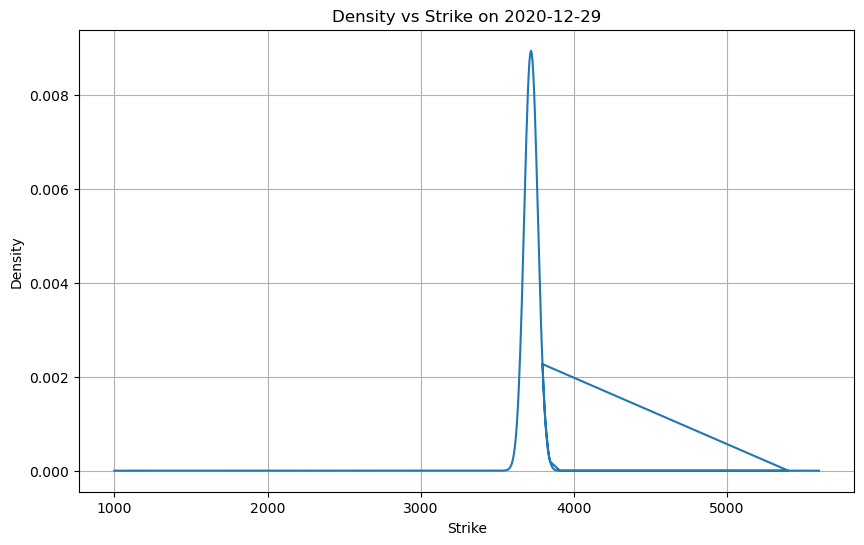

In [3]:
# Filter the dataset for a date
date = '2020-12-29'
filtered_data = data[['Strike', date]].dropna()

# Descriptive Statistics: Calculate skewness and kurtosis
skewness = skew(filtered_data[date].values)
kurt = kurtosis(filtered_data[date].values)

print("Skewness:", skewness)
print("Kurtosis:", kurt)


# Plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Strike'].values, filtered_data[date].values)
plt.title('Density vs Strike on ' + date)
plt.xlabel('Strike')
plt.ylabel('Density')
plt.grid(True)
plt.show()



## Power Law Fitting

In [4]:
results = powerlaw.Fit(filtered_data[date].values)
print("Power Law Fit")
print("a = " + str(results.power_law.alpha-1))
print("xmin = " + str(results.power_law.xmin))

#fat_threshold = 1
#alpha should be less than 1 we say

Calculating best minimal value for power law fit


/home/pourtoi/anaconda3/lib/python3.9/site-packages/powerlaw.py:1151: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
/home/pourtoi/anaconda3/lib/python3.9/site-packages/powerlaw.py:1170: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))


Power Law Fit: 99%
a = 0.3628035818475106
xmin = 0.00013804686362091373


## Fitting lognormal

In [5]:
# perform Power Law fit
results = powerlaw.Fit(filtered_data[date].values)

# print results
print("")
print("Log Normal Fit")
print("mu = " + str(results.lognormal.mu))
print("sigma = " + str(results.lognormal.sigma))
print("")

Calculating best minimal value for power law fit
xmin progress: 99%
Log Normal Fit
mu = -6.209870967254718
sigma = 1.3538389730184686



## Hill Tail Index Estimation

In [6]:
#from tail_index_estimation import *
# ================================================
# ========== Hill Tail Index Estimation ==========
# ================================================
def get_moments_estimates_1(ordered_data):
    """
    Function to calculate first moments array given an ordered data
    sequence. Decreasing ordering is required.

    Args:
        ordered_data: numpy array of ordered data for which
                      the 1st moment (Hill estimator)
                      is calculated.
    Returns:
        M1: numpy array of 1st moments (Hill estimator)
            corresponding to all possible order statistics
            of the dataset.

    """
    logs_1 = np.log(ordered_data)
    logs_1_cumsum = np.cumsum(logs_1[:-1])
    k_vector = np.arange(1, len(ordered_data))
    M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
    return M1

def get_moments_estimates_2(ordered_data):
    """
    Function to calculate first and second moments arrays
    given an ordered data sequence. 
    Decreasing ordering is required.

    Args:
        ordered_data: numpy array of ordered data for which
                      the 1st (Hill estimator) and 2nd moments 
                      are calculated.
    Returns:
        M1: numpy array of 1st moments (Hill estimator)
            corresponding to all possible order statistics
            of the dataset.
        M2: numpy array of 2nd moments corresponding to all 
            possible order statistics of the dataset.

    """
    logs_1 = np.log(ordered_data)
    logs_2 = (np.log(ordered_data))**2
    logs_1_cumsum = np.cumsum(logs_1[:-1])
    logs_2_cumsum = np.cumsum(logs_2[:-1])
    k_vector = np.arange(1, len(ordered_data))
    M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
    M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
         + logs_2[1:]
    return M1, M2

def get_moments_estimates_3(ordered_data):
    """
    Function to calculate first, second and third moments 
    arrays given an ordered data sequence. 
    Decreasing ordering is required.

    Args:
        ordered_data: numpy array of ordered data for which
                      the 1st (Hill estimator), 2nd and 3rd moments 
                      are calculated.
    Returns:
        M1: numpy array of 1st moments (Hill estimator)
            corresponding to all possible order statistics
            of the dataset.
        M2: numpy array of 2nd moments corresponding to all 
            possible order statistics of the dataset.
        M3: numpy array of 3rd moments corresponding to all 
            possible order statistics of the dataset.

    """
    logs_1 = np.log(ordered_data)
    logs_2 = (np.log(ordered_data))**2
    logs_3 = (np.log(ordered_data))**3
    logs_1_cumsum = np.cumsum(logs_1[:-1])
    logs_2_cumsum = np.cumsum(logs_2[:-1])
    logs_3_cumsum = np.cumsum(logs_3[:-1])
    k_vector = np.arange(1, len(ordered_data))
    M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
    M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
         + logs_2[1:]
    M3 = (1./k_vector)*logs_3_cumsum - (3.*logs_1[1:]/k_vector)*logs_2_cumsum\
         + (3.*logs_2[1:]/k_vector)*logs_1_cumsum - logs_3[1:]
    # cleaning exceptional cases
    clean_indices = np.where((M2 <= 0) | (M3 == 0) | (np.abs(1.-(M1**2)/M2) < 1e-10)\
                             |(np.abs(1.-(M1*M2)/M3) < 1e-10))
    M1[clean_indices] = np.nan
    M2[clean_indices] = np.nan
    M3[clean_indices] = np.nan
    return M1, M2, M3

def hill_dbs(ordered_data, t_bootstrap = 0.5,
            r_bootstrap = 500, eps_stop = 1.0,
            verbose = False, diagn_plots = False):
    """
        Function to perform double-bootstrap procedure for
        Hill estimator.

        Args:
            ordered_data: numpy array for which double-bootstrap
                          is performed. Decreasing ordering is required.
            t_bootstrap:  parameter controlling the size of the 2nd
                          bootstrap. Defined from n2 = n*(t_bootstrap).
            r_bootstrap:  number of bootstrap resamplings for the 1st and 2nd
                          bootstraps.
            eps_stop:     parameter controlling range of AMSE minimization.
                          Defined as the fraction of order statistics to consider
                          during the AMSE minimization step.
            verbose:      flag controlling bootstrap verbosity. 
            diagn_plots:  flag to switch on/off generation of AMSE diagnostic
                          plots.

        Returns:
            k_star:     number of order statistics optimal for estimation
                        according to the double-bootstrap procedure.
            x1_arr:     array of fractions of order statistics used for the
                        1st bootstrap sample.
            n1_amse:    array of AMSE values produced by the 1st bootstrap
                        sample.
            k1_min:     value of fraction of order statistics corresponding
                        to the minimum of AMSE for the 1st bootstrap sample.
            max_index1: index of the 1st bootstrap sample's order statistics
                        array corresponding to the minimization boundary set
                        by eps_stop parameter.
            x2_arr:     array of fractions of order statistics used for the
                        2nd bootstrap sample.
            n2_amse:    array of AMSE values produced by the 2nd bootstrap
                        sample.
            k2_min:     value of fraction of order statistics corresponding
                        to the minimum of AMSE for the 2nd bootstrap sample.
            max_index2: index of the 2nd bootstrap sample's order statistics
                        array corresponding to the minimization boundary set
                        by eps_stop parameter.

    """
    if verbose:
        print("Performing Hill double-bootstrap...")
    n = len(ordered_data)
    eps_bootstrap = 0.5*(1+np.log(int(t_bootstrap*n))/np.log(n))
    n1 = int(n**eps_bootstrap)
    samples_n1 = np.zeros(n1-1)
    good_counts1 = np.zeros(n1-1)
    k1 = None
    k2 = None
    min_index1 = 1
    min_index2 = 1
    while k2 == None:
        # first bootstrap with n1 sample size
        for i in range(r_bootstrap):
            sample = np.random.choice(ordered_data, n1, replace = True)
            sample[::-1].sort()
            M1, M2 = get_moments_estimates_2(sample)
            current_amse1 = (M2 - 2.*(M1)**2)**2
            samples_n1 += current_amse1
            good_counts1[np.where(current_amse1 != np.nan)] += 1
        averaged_delta = samples_n1 / good_counts1
        
        max_index1 = (np.abs(np.linspace(1./n1, 1.0, n1) - eps_stop)).argmin()
        k1 = np.nanargmin(averaged_delta[min_index1:max_index1]) + 1 + min_index1 #take care of indexing
        if diagn_plots:
            n1_amse = averaged_delta
            x1_arr = np.linspace(1./n1, 1.0, n1)
        
        # second bootstrap with n2 sample size
        n2 = int(n1*n1/float(n))
        samples_n2 = np.zeros(n2-1)
        good_counts2 = np.zeros(n2-1)
    
        for i in range(r_bootstrap):
            sample = np.random.choice(ordered_data, n2, replace = True)
            sample[::-1].sort()
            M1, M2 = get_moments_estimates_2(sample)
            current_amse2 = (M2 - 2.*(M1**2))**2
            samples_n2 += current_amse2
            good_counts2[np.where(current_amse2 != np.nan)] += 1
        max_index2 = (np.abs(np.linspace(1./n2, 1.0, n2) - eps_stop)).argmin()
        averaged_delta = samples_n2 / good_counts2
        
        
        k2 = np.nanargmin(averaged_delta[min_index2:max_index2]) + 1 + min_index2 #take care of indexing
        if diagn_plots:
            n2_amse = averaged_delta
            x2_arr = np.linspace(1./n2, 1.0, n2)

        if k2 > k1:
            print("Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...")
            # move left AMSE boundary to avoid numerical issues
            min_index1 = min_index1 + int(0.005*n)
            min_index2 = min_index2 + int(0.005*n)
            k2 = None
    
    '''
    # this constant is provided in the Danielsson's paper
    # use instead of rho below if needed
    rho = (np.log(k1)/(2.*np.log(n1) - np.log(k1)))\
          **(2.*(np.log(n1) - np.log(k1))/(np.log(n1)))
    '''
    
    # this constant is provided in Qi's paper
    rho = (1. - (2*(np.log(k1) - np.log(n1))/(np.log(k1))))**(np.log(k1)/np.log(n1) - 1.)
    
    k_star = (k1*k1/float(k2)) * rho
    k_star = int(np.round(k_star))
    
    # enforce k_star to pick 2nd value (rare cases of extreme cutoffs)
    if k_star == 0:
        k_star = 2
    if int(k_star) >= len(ordered_data):
        print("WARNING: estimated threshold k is larger than the size of data")
        k_star = len(ordered_data)-1
    if verbose:
        print("--- Hill double-bootstrap information ---")
        print("Size of the 1st bootstrap sample n1:", n1)
        print("Size of the 2nd bootstrap sample n2:", n2)
        print("Estimated k1:", k1)
        print("Estimated k2:", k2)
        print("Estimated constant rho:", rho)
        print("Estimated optimal k:", k_star)
        print("-----------------------------------------")
    if not diagn_plots:
        x1_arr, x2_arr, n1_amse, n2_amse = None, None, None, None
    return k_star, x1_arr, n1_amse, k1/float(n1), max_index1, x2_arr, n2_amse, k2/float(n2), max_index2

def hill_estimator(ordered_data,
                   bootstrap = True, t_bootstrap = 0.5,
                   r_bootstrap = 500, verbose = False,
                   diagn_plots = False, eps_stop = 0.99):
    """
    Function to calculate Hill estimator for a given dataset.
    If bootstrap flag is True, double-bootstrap procedure
    for estimation of the optimal number of order statistics is
    performed.

    Args:
        ordered_data: numpy array for which tail index estimation
                      is performed. Decreasing ordering is required.
        bootstrap:    flag to switch on/off double-bootstrap procedure.
        t_bootstrap:  parameter controlling the size of the 2nd
                      bootstrap. Defined from n2 = n*(t_bootstrap).
        r_bootstrap:  number of bootstrap resamplings for the 1st and 2nd
                      bootstraps.
        eps_stop:     parameter controlling range of AMSE minimization.
                      Defined as the fraction of order statistics to consider
                      during the AMSE minimization step.
        verbose:      flag controlling bootstrap verbosity. 
        diagn_plots:  flag to switch on/off generation of AMSE diagnostic
                      plots.

    Returns:
        results: list containing an array of order statistics,
                 an array of corresponding tail index estimates,
                 the optimal order statistic estimated by double-
                 bootstrap and the corresponding tail index,
                 an array of fractions of order statistics used for
                 the 1st bootstrap sample with an array of corresponding
                 AMSE values, value of fraction of order statistics
                 corresponding to the minimum of AMSE for the 1st bootstrap
                 sample, index of the 1st bootstrap sample's order statistics
                 array corresponding to the minimization boundary set
                 by eps_stop parameter; and the same characteristics for the
                 2nd bootstrap sample.
    """
    k_arr = np.arange(1, len(ordered_data))
    xi_arr = get_moments_estimates_1(ordered_data)
    if bootstrap:
        results = hill_dbs(ordered_data,
                           t_bootstrap = t_bootstrap,
                           r_bootstrap = r_bootstrap,
                           verbose = verbose, 
                           diagn_plots = diagn_plots,
                           eps_stop = eps_stop)
        k_star, x1_arr, n1_amse, k1, max_index1, x2_arr, n2_amse, k2, max_index2 = results
        while k_star == None:
            print("Resampling...")
            results = hill_dbs(ordered_data,
                           t_bootstrap = t_bootstrap,
                           r_bootstrap = r_bootstrap,
                           verbose = verbose, 
                           diagn_plots = diagn_plots,
                           eps_stop = eps_stop)
            k_star, x1_arr, n1_amse, k1, max_index1, x2_arr, n2_amse, k2, max_index2 = results
        xi_star = xi_arr[k_star-1]
        print("Adjusted Hill estimated gamma:", 1 + 1./xi_star)
        print("**********")
    else:
        k_star, xi_star = None, None
        x1_arr, n1_amse, k1, max_index1 = 4*[None]
        x2_arr, n2_amse, k2, max_index2 = 4*[None]
    results = [k_arr, xi_arr, k_star, xi_star, x1_arr, n1_amse, k1, max_index1,\
               x2_arr, n2_amse, k2, max_index2]
    return results

def smooth_hill_estimator(ordered_data, r_smooth = 2):
    """
    Function to calculate smooth Hill estimator for a
    given ordered dataset.

    Args:
        ordered_data: numpy array for which tail index estimation
                      is performed. Decreasing ordering is required.
        r_smooth:     integer parameter controlling the width
                      of smoothing window. Typically small
                      value such as 2 or 3.
    Returns:
        k_arr:  numpy array of order statistics based on the data provided.
        xi_arr: numpy array of tail index estimates corresponding to 
                the order statistics array k_arr.
    """
    n = len(ordered_data)
    M1 = get_moments_estimates_1(ordered_data)
    xi_arr = np.zeros(int(np.floor(float(n)/r_smooth)))
    k_arr = np.arange(1, int(np.floor(float(n)/r_smooth))+1)
    xi_arr[0] = M1[0]
    bin_lengths = np.array([1.]+[float((r_smooth-1)*k) for k in k_arr[:-1]])
    cum_sum = 0.0
    for i in range(1, r_smooth*int(np.floor(float(n)/r_smooth))-1):
        k = i
        cum_sum += M1[k]
        if (k+1) % (r_smooth) == 0:
            xi_arr[int(k+1)//int(r_smooth)] = cum_sum
            cum_sum -= M1[int(k+1)//int(r_smooth)]
    xi_arr = xi_arr/bin_lengths
    return k_arr, xi_arr

In [7]:
# Drop rows with missing values in both columns
df_clean = data.dropna(subset=['Strike', '2020-12-29'])

# # Extract relevant columns
strike_prices = df_clean['Strike'].values
risk_neutral_densities = df_clean['2020-12-29'].values

# # Remove NaN values from both arrays
strike_prices = strike_prices[~np.isnan(risk_neutral_densities)]
risk_neutral_densities = risk_neutral_densities[~np.isnan(risk_neutral_densities)]

# # Sort the data by strike prices in descending order
sorted_indices = np.argsort(risk_neutral_densities)[::-1]
strike_prices = strike_prices[sorted_indices]
risk_neutral_densities = risk_neutral_densities[sorted_indices]

# # Convert the data into numpy array format
ordered_data = risk_neutral_densities



In [8]:
ordered_data

array([ 8.95211519e-003,  8.89947066e-003,  8.89343610e-003,
        8.73799134e-003,  8.72506721e-003,  8.47409903e-003,
        8.45270185e-003,  8.11772567e-003,  8.08577886e-003,
        7.68169585e-003,  7.63694153e-003,  7.18096786e-003,
        7.12131257e-003,  6.63179517e-003,  6.55564338e-003,
        6.05087265e-003,  5.95740502e-003,  5.45452786e-003,
        5.34389035e-003,  4.85800904e-003,  4.73139190e-003,
        4.27490835e-003,  4.13450973e-003,  3.71674409e-003,
        3.56562772e-003,  3.19271047e-003,  3.03457948e-003,
        2.70958911e-003,  2.54850663e-003,  2.27180528e-003,
        2.11189593e-003,  1.88160312e-003,  1.72676854e-003,
        1.53930946e-003,  1.39298559e-003,  1.24365423e-003,
        1.10863012e-003,  9.92117072e-004,  8.70425568e-004,
        7.81273528e-004,  6.74154700e-004,  6.07119276e-004,
        5.15049780e-004,  4.65357038e-004,  3.88132504e-004,
        3.51636578e-004,  2.88490918e-004,  2.61743670e-004,
        2.11488348e-004,

In [9]:
# # Use the Hill estimator to estimate the tail index
results = hill_estimator(ordered_data)

k_arr, xi_arr, k_star, xi_star, _, _, _, _, _, _, _, _ = results
estimated_tail_index = 1 + 1 / xi_star

print("Estimated tail index:", 1+ 1/results[3])

Adjusted Hill estimated gamma: 276.68482782446813
**********
Estimated tail index: 276.68482782446813


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2


### Generalization to the whole datatset

In [33]:
tail_indices = {}
# Iterate over each date column
for date_column in data.columns[1:]:  # Exclude the first column 'Strike'
    # Drop rows with missing values in both columns
    df_clean = data[['Strike', date_column]].dropna()

    # Remove rows with zero density values
    #df_clean = df_clean[df_clean[date_column] > 0]

    # Check if there is any valid data remaining after dropping NaN and zero values
    if len(df_clean) == 0:
        continue

    # # Extract relevant columns
    strike_prices = df_clean['Strike'].values
    risk_neutral_densities = df_clean[date_column].values

    # # Remove NaN values from both arrays
    strike_prices = strike_prices[~np.isnan(risk_neutral_densities)]
    risk_neutral_densities = risk_neutral_densities[~np.isnan(risk_neutral_densities)]
    
    # # Sort the data by strike prices in descending order
    sorted_indices = np.argsort(risk_neutral_densities)[::-1]
    strike_prices = strike_prices[sorted_indices]
    risk_neutral_densities = risk_neutral_densities[sorted_indices]
    
    # Use the Hill estimator to estimate the tail index
    results = hill_estimator(risk_neutral_densities)

    # Extract the estimated tail index
    _, _, _, xi_star, _, _, _, _, _, _, _, _ = results
    estimated_tail_index = xi_star

    # Store the estimated tail index for the current date
    tail_indices[date_column] = estimated_tail_index

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 123.3687053667626
**********
Adjusted Hill estimated gamma: 78.25995011038917
**********


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 145.335627651604
**********
Adjusted Hill estimated gamma: 27.415476179357913
**********


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 50.78723638010144
**********
Adjusted Hill estimated gamma: 43.11441285104249
**********


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 1293.178834813675
**********
Adjusted Hill estimated gamma: 574.5613520165118
**********


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 218.72512429547012
**********
Adjusted Hill estimated gamma: 432.3503082716956
**********


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 40.4406202360502
**********
Adjusted Hill estimated gamma: 257.9875226975566
**********


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 52.411958983957554
**********
Adjusted Hill estimated gamma: 29.66009531719925
**********


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/

Adjusted Hill estimated gamma: 56.03165816430369
**********
Adjusted Hill estimated gamma: 57.32514802438527
**********
Adjusted Hill estimated gamma: 119.12946479406857
**********


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/

Adjusted Hill estimated gamma: 60.52910906719194
**********
Adjusted Hill estimated gamma: 276.68482782446813
**********


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2


Adjusted Hill estimated gamma: 270.66191554726464
**********
Adjusted Hill estimated gamma: 21.558183522199496
**********


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

In [34]:
for date, tail_index in tail_indices.items():
    print(f"Date: {date}, Estimated Tail Index: {tail_index}")

Date: 2020-12-01, Estimated Tail Index: 0.008172024023648916
Date: 2020-12-02, Estimated Tail Index: 0.01294331666757742
Date: 2020-12-03, Estimated Tail Index: 0.006928296334525186
Date: 2020-12-04, Estimated Tail Index: 0.03785659562637145
Date: 2020-12-07, Estimated Tail Index: 0.020085469142442136
Date: 2020-12-08, Estimated Tail Index: 0.02374484012247713
Date: 2020-12-09, Estimated Tail Index: 0.0007738866889459572
Date: 2020-12-10, Estimated Tail Index: 0.0017434926472716938
Date: 2020-12-11, Estimated Tail Index: 0.004592947199988373
Date: 2020-12-14, Estimated Tail Index: 0.0023183013453884627
Date: 2020-12-15, Estimated Tail Index: 0.025354570846377378
Date: 2020-12-16, Estimated Tail Index: 0.0038912395026153845
Date: 2020-12-17, Estimated Tail Index: 0.01945072741367504
Date: 2020-12-18, Estimated Tail Index: 0.03489171926793588
Date: 2020-12-21, Estimated Tail Index: 0.018171358693470196
Date: 2020-12-22, Estimated Tail Index: 0.01775405897854121
Date: 2020-12-23, Estimate

In [73]:
def hill (data):
    tail_indices = {}
    # Iterate over each date column
    for date_column in data.columns[1:]:  # Exclude the first column 'Strike'
        # Drop rows with missing values in both columns
        df_clean = data[['Strike', date_column]].dropna()
    
        # Remove rows with zero density values
        #df_clean = df_clean[df_clean[date_column] > 0]
    
        # Check if there is any valid data remaining after dropping NaN and zero values
        if len(df_clean) == 0:
            continue
    
        # # Extract relevant columns
        strike_prices = df_clean['Strike'].values
        risk_neutral_densities = df_clean[date_column].values
    
        # # Remove NaN values from both arrays
        strike_prices = strike_prices[~np.isnan(risk_neutral_densities)]
        risk_neutral_densities = risk_neutral_densities[~np.isnan(risk_neutral_densities)]
        
        # # Sort the data by strike prices in descending order
        sorted_indices = np.argsort(risk_neutral_densities)[::-1]
        strike_prices = strike_prices[sorted_indices]
        risk_neutral_densities = risk_neutral_densities[sorted_indices]
        
        # Use the Hill estimator to estimate the tail index
        results = hill_estimator(risk_neutral_densities)
    
        # Extract the estimated tail index
        _, _, _, xi_star, _, _, _, _, _, _, _, _ = results
        estimated_tail_index = xi_star
    
        # Store the estimated tail index for the current date
        tail_indices[date_column] = estimated_tail_index

        for date, tail_index in tail_indices.items():
            if tail_index >= 0.10:
                
                print(f"Date: {date}, Estimated Tail Index: {round(tail_index,2)}")

In [74]:
# List to store dataframes for each month
monthly_dataframes = []

# Loop through each month
for month in range(1, 13):
    # Construct the filename using string formatting
    filename = f"Densities_Strikes_Monthly{month}.csv"
    
    # Read the CSV file into a dataframe
    df = pd.read_csv(filename)
    
    # Append the dataframe to the list
    monthly_dataframes.append(df)

# Concatenate all dataframes into a single dataframe
combined_dataframe = pd.concat(monthly_dataframes, ignore_index=True)

In [75]:
hill(combined_dataframe)

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 5.949104030080659
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Adjusted Hill estimated gamma: 70.36114248155616
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Adjusted Hill estimated gamma: 15.123385968884211
**********
Date: 2020-01-02, Estimated Tail Index: 0.2


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 19.40208667770537
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Adjusted Hill estimated gamma: 32.196862896799544
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Adjusted Hill estimated gamma: 12.675690321316939
**********
Date: 2020-01-02, Estimated Tail Index: 0.2


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 50.69380146222971
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Adjusted Hill estimated gamma: 6.25491719688247
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Adjusted Hill estimated gamma: 25.782996579047115
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 76.97178637595756
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Adjusted Hill estimated gamma: 17.271155762022524
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Adjusted Hill estimated gamma: 7.152085817708609
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 30.88987459068021
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...
Adjusted Hill estimated gamma: 213.44450875523935
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 14.165095105685289
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 188.49235242213433
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 161.85326653395535
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 55.721018166633755
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...
Adjusted Hill estimated gamma: 325.17098708200297
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 41.727619162983686
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 728.9048016950691
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 161.98996767123836
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/

Adjusted Hill estimated gamma: 39.6720509244073
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 11.704180776971151
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 7.246865079272443
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 78.10951485103361
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 11.430580942348874
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 48.7497834738702
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 10.331552543142191
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 95.2049555480488
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Adjusted Hill estimated gamma: 7.232023577144248
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 59.33616409300182
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 195.25491259920022
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 225.7409025870796
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 122.69581186467902
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...
Adjusted Hill estimated gamma: 403.22731455133317
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 482.1181588733496
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/

Adjusted Hill estimated gamma: 1007.2298345483866
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 1558.4269477816586
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 596.3303343417281
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: 

Adjusted Hill estimated gamma: 86.8341231824392
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 191.08850127044212
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 385.5292198804812
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 412.8834851048015
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 394.67360139926075
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 922.3528906078009
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2


Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...
Adjusted Hill estimated gamma: 697.6755984224607
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 124.57853641531791
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23:

Adjusted Hill estimated gamma: 682.7407120129081
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 147.5823210129749
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/

Adjusted Hill estimated gamma: 971567.5975188225
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 255.32612589860125
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 769.0233766190285
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: 

Adjusted Hill estimated gamma: 1020.8450558432912
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 985.1394627236987
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 441.73819294595
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/

Adjusted Hill estimated gamma: 75.42874266362088
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 1283.694191279491
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 219.3688106600245
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Adjusted Hill estimated gamma: 909.9978908934978
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_

Adjusted Hill estimated gamma: 2.5200423734584176
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 641.9079760691827
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 274.70622173667994
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 64.36389603134276
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 511.0264911310982
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23:

Adjusted Hill estimated gamma: 139.55356369568466
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 196.21044555400272
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 209.5788591778047
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 339.4108061635705
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 146.92896931147752
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 36.457018647442524
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 1869.0853101554019
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 137.77038176441653
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 46.94953631573192
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 256.1431119959027
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 5760.121423228011
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 248.42464575679816
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 598.3200728155224
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 52.10231611030339
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 183.0447934667191
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 1046.6671582367699
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 172.93064003493242
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 380.683121941579
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 1138.419930796003
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 57.03889760367199
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 230.10474664767958
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 50.25736327291845
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 64.82079582964522
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 34.431321523555155
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 166.7764439735079
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 709.5674336600177
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2


Adjusted Hill estimated gamma: 380.7913013439997
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 132.45849354910283
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 123.04029155259752
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 345.15978691557285
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 858.7173007134575
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 103.1167032903449
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 249.68613058355837
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 236.67132732087745
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 443.26179855609763
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 93.14973992386376
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 287.3790417319026
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 39.958585361237084
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 237.06780890082047
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 15.070925161957058
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 133.08186532676166
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 296.4562813241598
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 143.61309466236267
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 29.07741488361705
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 383.17677824207243
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 417.8008621959457
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 587.1251637274405
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 378.0486582258563
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 566.9679547635573
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 405.1269953760208
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 664.5114661237865
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 321.6687434235393
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 125.92875334884803
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 505.9746625107287
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 2705.0491350796865
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 273.6773227794516
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 1473.596284427455
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 805.2187808205628
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 84.47476285574932
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 217.53002764803784
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 222.93817504356272
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 35.52058571600653
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 308.01736649675706
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 114.82517024875467
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 233.20535077624493
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 24.874810448559344
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 335.0630943895516
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 54.86247915179558
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 139.19630325232123
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 65.43824320507738
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 254.9547440746336
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 51.38634261493356
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 51.882041908608834
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 54.2518077304862
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 539.5292401764963
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 429.14252700628356
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 133.1982277909595
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 545.6640452491031
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 109.15470127601714
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 175.31890757980864
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 19.33667527229348
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 88.7746681297086
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 23.025050972937564
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 51.56398087106611
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 18.551765084045837
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 16.544407391647415
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 52.103849369953146
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 517.9578764994853
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 56.35669049369035
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 77.82496676340469
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 98.5626422862031
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 171.7347348310228
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 30.139794825167943
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 483.5129212125234
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 66.51834776373516
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 34.182794676900166
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 22.998710016699672
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 29.655739592378215
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 50.07437661770005
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 166.33584544128257
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 22.287755961138807
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 186.51877242692004
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Adjusted Hill estimated gamma: 7.649328591667749
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 72.11857191273732
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 1677.6187407597793
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 406.5959559702074
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 1270.9560508655834
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 2023.0245031661298
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 1016.4756158629594
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 212.05909605921508
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 613.4583892148504
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 160.24256916911847
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 400.5805046290282
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...
Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...
Adjusted Hill estimated gamma: 2280.065731845013
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated 

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 168.22224636342827
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 159.54857061220181
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 1232.8534111528056
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 708.8959678237061
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 181.33685376612002
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 33.46876648066738
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2


Adjusted Hill estimated gamma: 31.639713287638333
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 280.25642194811974
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 65.95527999513594
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 178.96574303322785
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 87.55436624860552
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 365.16696107804313
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 295.86798892444546
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 85.54315479066464
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 67.25069326645831
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 232.2773986548456
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 133.8002110757341
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...
Adjusted Hill estimated gamma: 1943.2722968505461
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 213.24278460171323
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...
Adjusted Hill estimated gamma: 1004.2711170193398
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 601.0519729601536
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 438.5855408305335
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 880.4008155002916
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 603.2377744963916
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 84.92251296364243
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 138.88582762138356
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 155.637950792178
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 1788.9682726267656
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 3482.8168954398984
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/

Adjusted Hill estimated gamma: 542.4888007738033
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 1542.93852844386
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 2506.3434710462648
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 260.8822866854253
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 111.77534977369797
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 91.53717856410759
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 421.91859285833374
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 150.2907075011346
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 183.54718112656496
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 141.1404749757021
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 56.83845679779346
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 23.482509596143785
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-0

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 85.43492827496021
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 1141.03725515011
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 358.63969392266847
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 722.2595527804007
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 60.21503878234697
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 29.87851827669023
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 53.37451724226722
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 152.1679452310943
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 123.3687053667626
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 78.25995011038917
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 145.335627651604
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 27.415476179357913
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 50.78723638010144
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 43.11441285104249
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\


Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...
Adjusted Hill estimated gamma: 798.6218812232822
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 574.5613520165118
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 218.72512429547012
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in subtract
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/2087336171.py:50: RuntimeWarning: invalid value encountered in add
  M2 = (1./k_vector)*logs_2_cumsum - (2.*logs_1[1:]/k_vector)*logs_1_cumsum\
/tmp/ipykernel_2728/20

Adjusted Hill estimated gamma: 432.3503082716956
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 40.4406202360502
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 200.76249463006343
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 52.411958983957554
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 29.66009531719925
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 56.03165816430369
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 57.32514802438527
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs_1[1:]
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: divide by zero encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:49: RuntimeWarning: invalid value encountered in subtract
  M1 = (1./k_vector)*logs_1_cumsum - logs

Adjusted Hill estimated gamma: 28.88814871831402
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Warning (Hill): k2 > k1, AMSE false minimum suspected, resampling...
Adjusted Hill estimated gamma: 60.52910906719194
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15
Adjusted Hill estimated gamma: 276.68482782446813
**********
Date: 2020-01-02, Estimated Tail

/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:44: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:45: RuntimeWarning: invalid value encountered in log
  logs_2 = (np.log(ordered_data))**2
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: divide by zero encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:20: RuntimeWarning: invalid value encountered in log
  logs_1 = np.log(ordered_data)
/tmp/ipykernel_2728/2087336171.py:23:

Adjusted Hill estimated gamma: 21.558183522199496
**********
Date: 2020-01-02, Estimated Tail Index: 0.2
Date: 2020-01-13, Estimated Tail Index: 0.19
Date: 2020-01-17, Estimated Tail Index: 0.16
Date: 2020-02-06, Estimated Tail Index: 0.16
Date: 2020-02-12, Estimated Tail Index: 0.11
Date: 2020-02-14, Estimated Tail Index: 0.16
Date: 2020-03-30, Estimated Tail Index: 0.66
Date: 2020-09-01, Estimated Tail Index: 0.15


In [116]:
# List of desired dates
dates = [
    '2020-01-02',
    '2020-01-13',
    '2020-01-17',
    '2020-02-06',
    '2020-02-12',
    '2020-02-14',
    '2020-03-30',
    '2020-09-01'
]

# Create a list of column names to select from the data DataFrame
columns_to_select = ['Strike'] + dates

# Create a new DataFrame containing only the desired columns
new_data = combined_dataframe[columns_to_select]

In [117]:
new_data

,Strike,2020-01-02,2020-01-13,2020-01-17,2020-02-06,2020-02-12,2020-02-14,2020-03-30,2020-09-01
0,1400,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1500,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1600,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1700,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1800,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4703,4125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4704,4175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4705,4225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4706,4250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
import powerlaw

# Collect the results in a list of tuples
results_list = []

for date in new_data.columns[1:]:
    results = powerlaw.Fit(new_data[date].values)
    results_list.append((date, results))

# Sort the results based on the dates
sorted_results = sorted(results_list, key=lambda x: x[0])

# Print the sorted results
for date, results in sorted_results:
    print("Date:", date)
    print("Power Law Fit")
    print("a =", results.power_law.alpha - 1)
    print("xmin =", results.power_law.xmin)


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Date: 2020-01-028%
Power Law Fit
a = 1.0308331238077217
xmin = 0.009346679014378
Date: 2020-01-13
Power Law Fit
a = 6.469761640847125
xmin = 0.0290360842230531
Date: 2020-01-17
Power Law Fit
a = 0.49251418734732755
xmin = 0.001586299906643
Date: 2020-02-06
Power Law Fit
a = 0.16167393524522278
xmin = 6.361602148728929e-06
Date: 2020-02-12
Power Law Fit
a = 0.6313122037594183
xmin = 0.0027724597243158
Date: 2020-02-14
Power Law Fit
a = 0.686197202695825
xmin = 0.00334624696172
Date: 2020-03-30
Power Law Fit
a = 0.47724977039973404
xmin = 0.0011279888494705
Date: 2020-09-01
Power Law Fit
a = 0.986284280

Values less than or equal to 0 in data. Throwing out 0 or negative values
/home/pourtoi/anaconda3/lib/python3.9/site-packages/powerlaw.py:1151: RuntimeWarning: overflow encountered in true_divide
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
/home/pourtoi/anaconda3/lib/python3.9/site-packages/powerlaw.py:1170: RuntimeWarning: overflow encountered in true_divide
  return 1 + len(data)/sum(log(data / (self.xmin)))
/home/pourtoi/anaconda3/lib/python3.9/site-packages/powerlaw.py:1184: RuntimeWarning: overflow encountered in power
  return x**-self.alpha
/home/pourtoi/anaconda3/lib/python3.9/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/home/pourtoi/anaconda3/lib/python3.9/site-packages/powerlaw.py:1180: RuntimeWarning: overflow encountered in true_divide
  CDF = 1-(x/self.xmin)**(-self.alpha+1)
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less 

In [118]:
new_data1 = new_data.drop(columns=['2020-01-02', '2020-01-13'])

In [121]:
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Strike      4708 non-null   int64  
 1   2020-01-17  165 non-null    float64
 2   2020-02-06  230 non-null    float64
 3   2020-02-12  229 non-null    float64
 4   2020-02-14  181 non-null    float64
 5   2020-03-30  383 non-null    float64
 6   2020-09-01  198 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 257.6 KB


Date: 2020-01-17
Skewness: 5.629148339158583
Kurtosis: 31.91083948824179


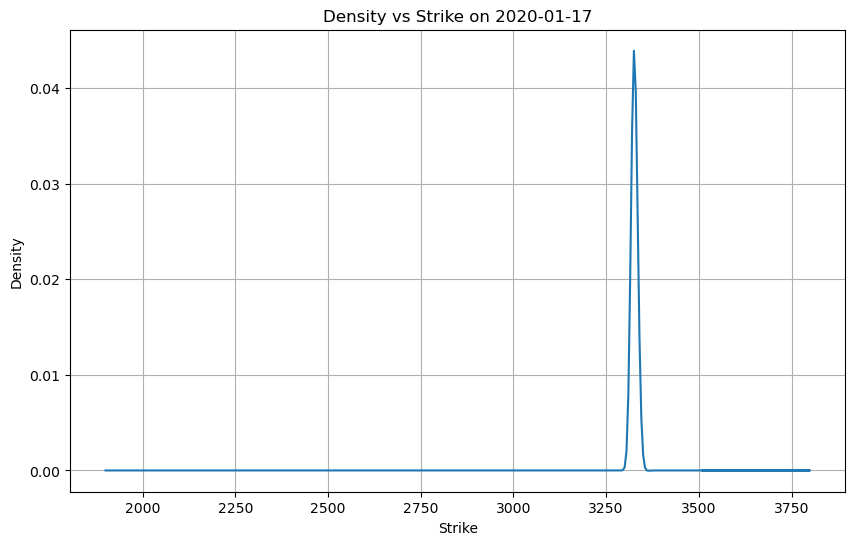

Date: 2020-02-06
Skewness: 5.731275880990658
Kurtosis: 33.119164180984


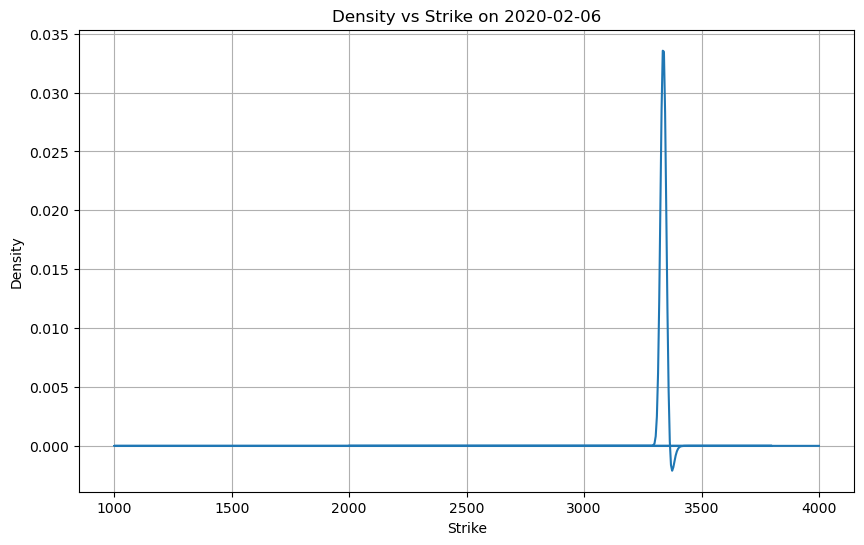

Date: 2020-02-12
Skewness: 5.80214371232348
Kurtosis: 33.95928218943354


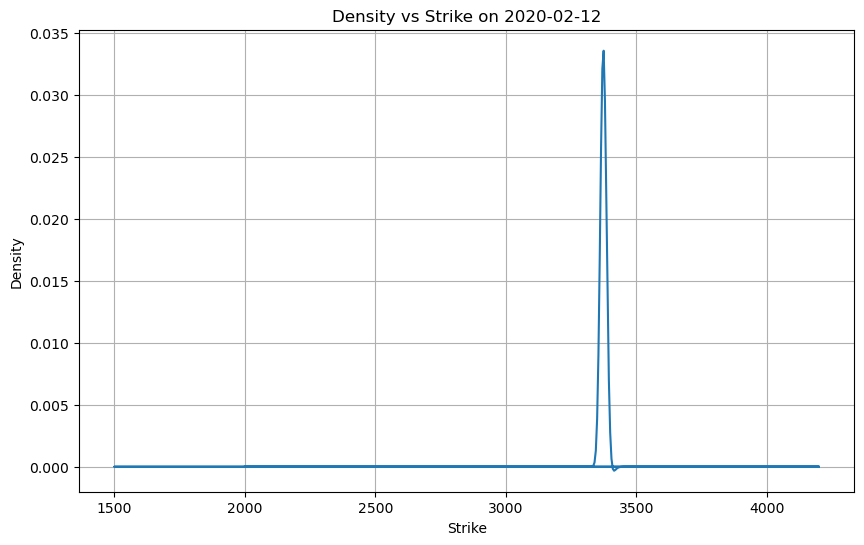

Date: 2020-02-14
Skewness: 5.514951266029799
Kurtosis: 30.563114828053124


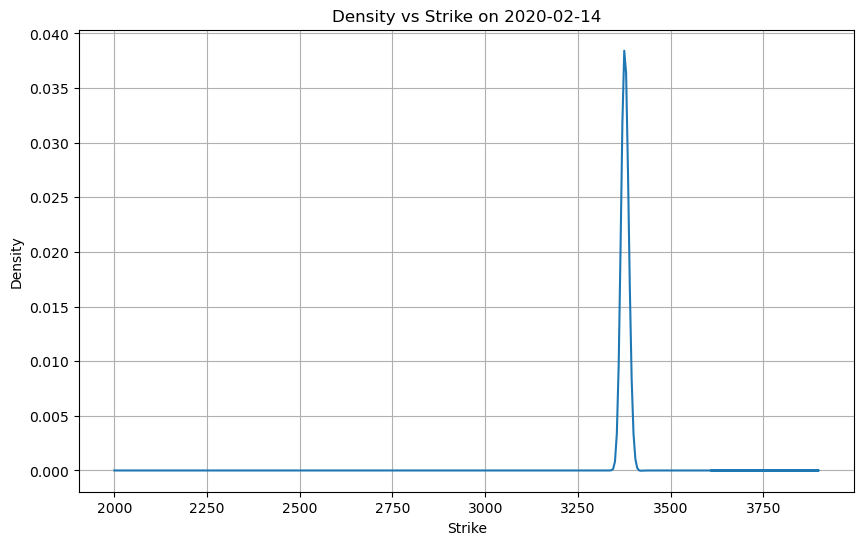

Date: 2020-03-30
Skewness: -8.752666322870494
Kurtosis: 128.74223517741024


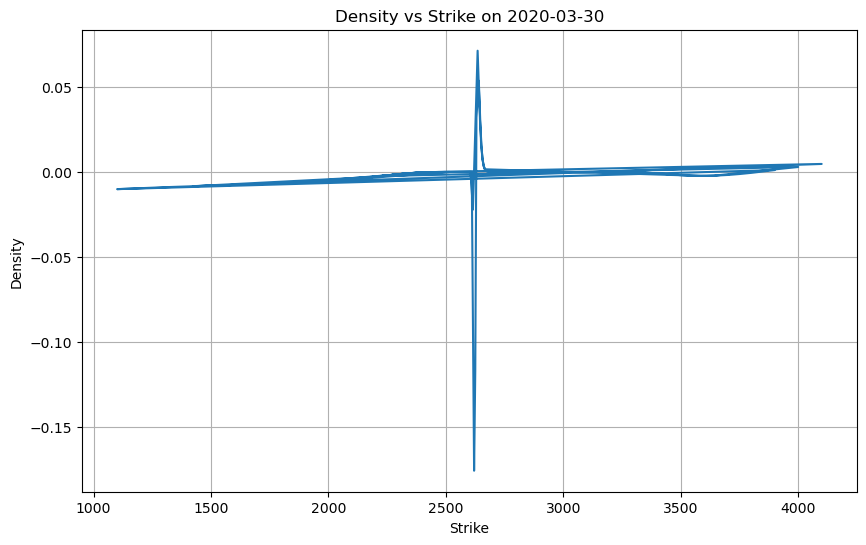

Date: 2020-09-01
Skewness: 5.242059384620973
Kurtosis: 27.434740003378653


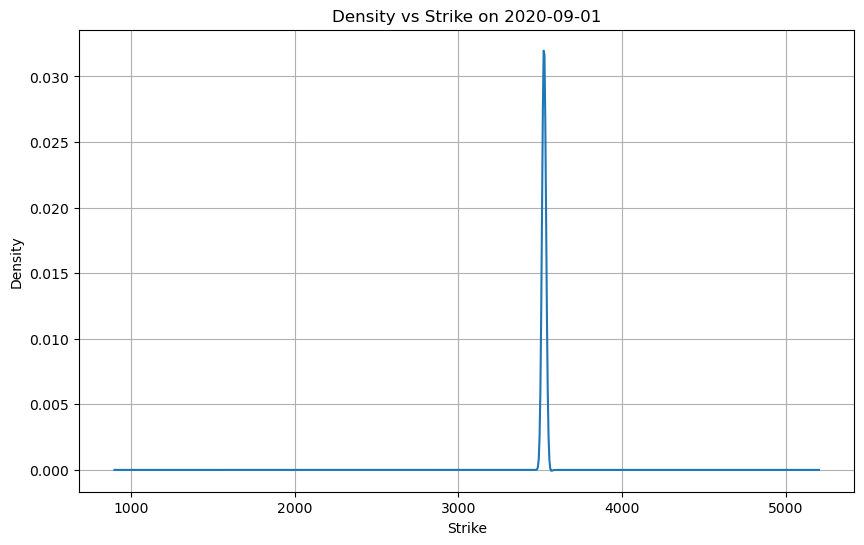

In [123]:
# Iterate over the columns of new_data1
for date in new_data1.columns[1:]:
    # Filter the dataset for the current date and drop NaN values
    filtered_data = new_data1[['Strike', date]].dropna()

    # Filter out strikes corresponding to NaN densities
    filtered_data = filtered_data[~filtered_data[date].isnull()]

    # Descriptive Statistics: Calculate skewness and kurtosis
    skewness = skew(filtered_data[date].values)
    kurt = kurtosis(filtered_data[date].values)

    print("Date:", date)
    print("Skewness:", skewness)
    print("Kurtosis:", kurt)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['Strike'].values, filtered_data[date].values)
    plt.title('Density vs Strike on ' + date)
    plt.xlabel('Strike')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()